In [1]:
import numpy as np

from Code.Tutorial.Dataset import load_scg
from scipy.signal import find_peaks
from scipy.interpolate import interp1d
import matplotlib.pylab as plt
from tqdm import tqdm

In [2]:
# def segmentation(signal, rpeak, h, d):
#     begin, end = 0, 0
#     margin = rpeak[0]
#     pieces = []
#
#     for num in range(1, len(rpeak)):
#         begin = end
#         end = rpeak[num] - margin
#         pieces.append(signal[begin: end])
#
#     Nmax = 0
#     for piece in pieces:
#         Nmax = max(Nmax, piece.shape[0])
#
#     pieces_padded = []
#     for piece in pieces:
#         N = Nmax - piece.shape[0]
#         pieces_padded.append(np.pad(piece, (0, N), 'constant'))
#     pieces_padded = np.array(pieces_padded)
#
#     template = np.median(pieces_padded, 0)
#
#     # template_peaks_ = get_peaks(template, distance, duration, fs)
#     template_peaks_, _ = find_peaks(template, height=np.max(template) * h, distance=len(template) * d)
#     template_peaks = []
#
#     if len(template_peaks_) == 2:
#         template_peaks = template_peaks_
#     elif len(template_peaks_) > 2:
#         mmax = np.argmax(template[template_peaks_])
#         template_peaks.append(template_peaks_[mmax])
#         template_peaks_ = np.delete(template_peaks_, mmax)
#         mmax2 = np.argmax(template[template_peaks_])
#         template_peaks.append(template_peaks_[mmax2])
#     elif len(template_peaks_) < 2:
#         plt.figure()
#         plt.plot(template)
#         plt.scatter(template_peaks_, template[template_peaks_])
#         plt.show()
#         return None
#
#     dis12 = template_peaks[1] - template_peaks[0]
#     dis21 = Nmax - dis12
#     A0 = template[template_peaks[0]]
#     A1 = template[template_peaks[1]]
#
#     # plt.plot(template)
#     # plt.scatter(template_peaks, template[template_peaks])
#     # plt.show()
#     return [dis12/dis21, A0/A1]

In [31]:
if __name__=='__main__':
    def load_(path):
        data = np.load(path)
        signals, labels = data[:, :1000], data[:, 1000:]
        return signals, labels

    def prepare_data(noise_level):
        signals_n_0_train, labels_n_0_train, duration, fs  = load_scg(noise_level, 'train')
        signals_n_0_test, labels_n_0_test, _, _ = load_scg(noise_level, 'test')

        signals_n_0_train_ls = []
        labels_n_0_train_ls = []
        for cnt, signal in enumerate(signals_n_0_train):
            if max(signal) > 1:
                continue
            signals_n_0_train_ls.append(signal)
            labels_n_0_train_ls.append(labels_n_0_train[cnt])


        signals_n_0_test_ls = []
        labels_n_0_test_ls = []
        for cnt, signal in enumerate(signals_n_0_test):
            if max(signal) > 1:
                continue
            signals_n_0_test_ls.append(signal)
            labels_n_0_test_ls.append(labels_n_0_test[cnt])

        signals_n_0_train = np.array(signals_n_0_train_ls)
        signals_n_0_test = np.array(signals_n_0_test_ls)
        labels_n_0_train = np.array(labels_n_0_train_ls)
        labels_n_0_test = np.array(labels_n_0_test_ls)
        print(signals_n_0_train.shape, signals_n_0_test.shape)
        return signals_n_0_train, signals_n_0_test, labels_n_0_train, labels_n_0_test
    signals_n_0_train, signals_n_0_test, labels_n_0_train, labels_n_0_test = prepare_data(0)
    signals_n_1_train, signals_n_1_test, labels_n_1_train, labels_n_1_test = prepare_data(0.1)


(4718, 1000) (2822, 1000)
(4718, 1000) (2822, 1000)


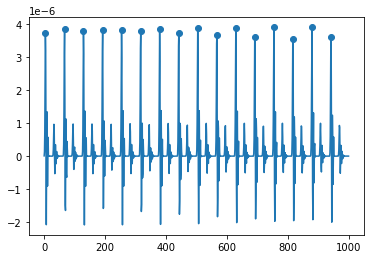

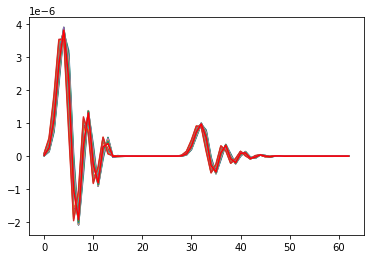

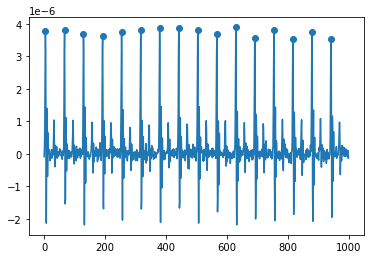

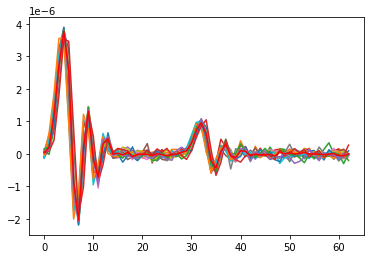

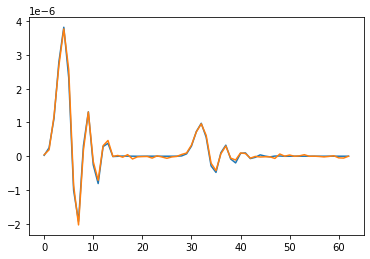

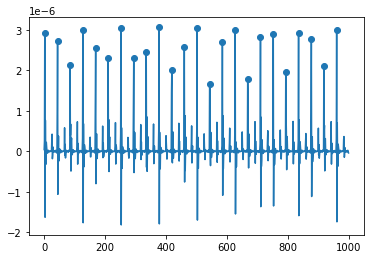

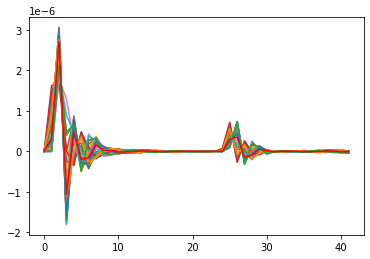

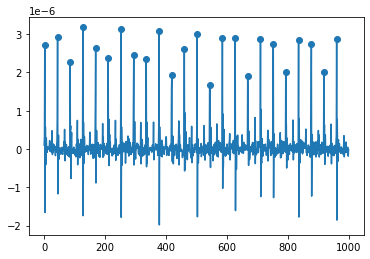

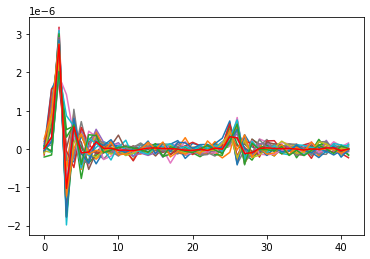

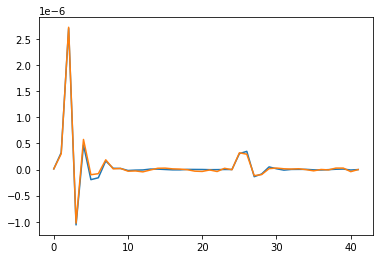

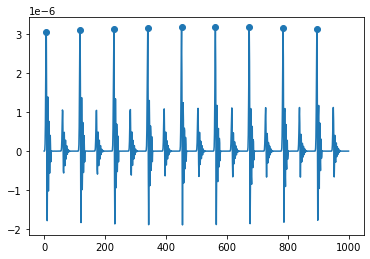

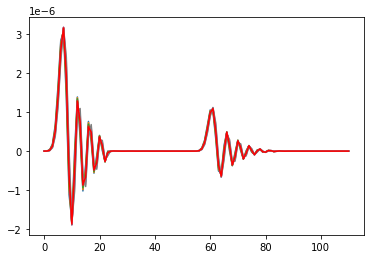

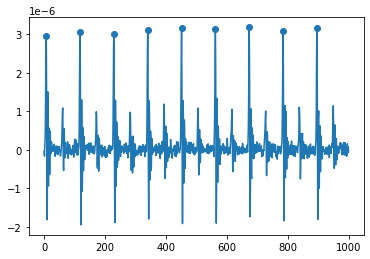

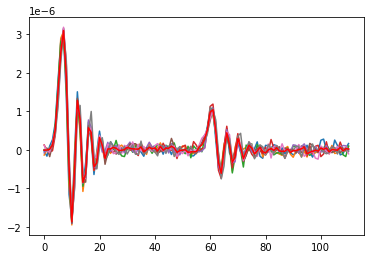

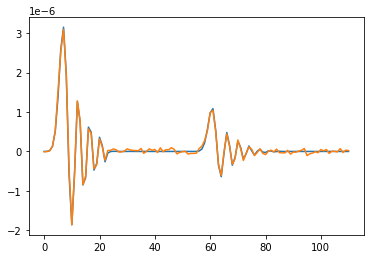

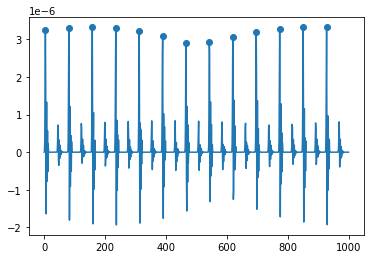

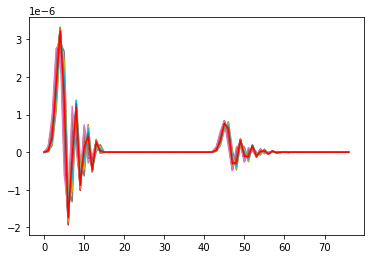

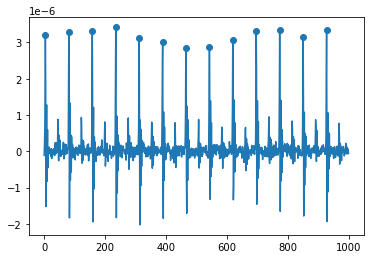

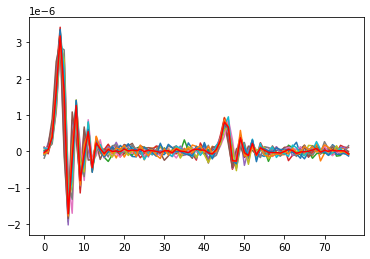

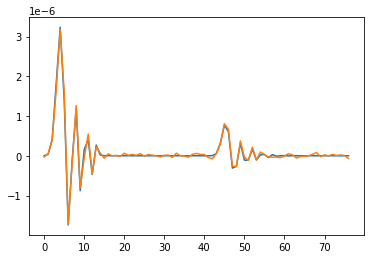

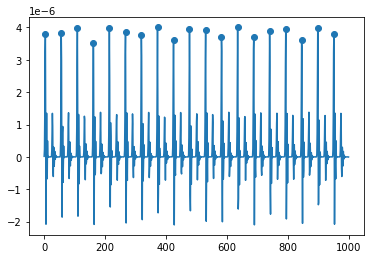

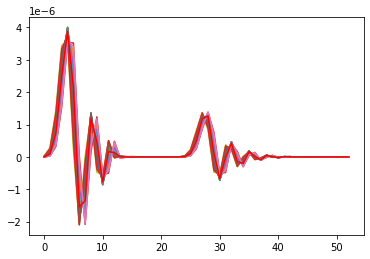

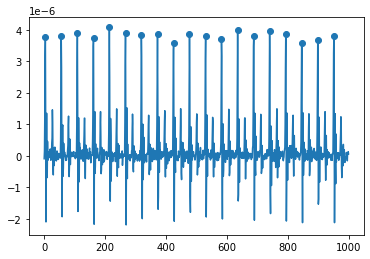

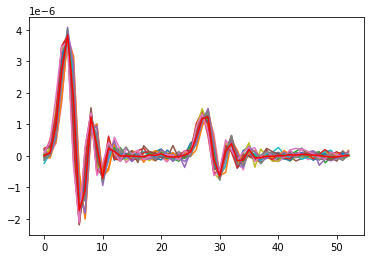

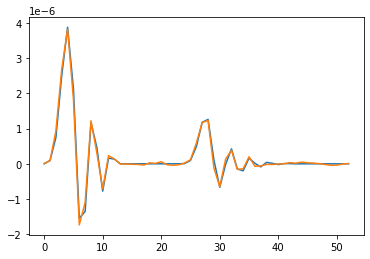

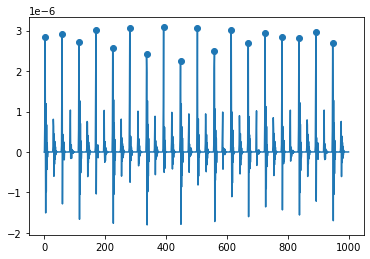

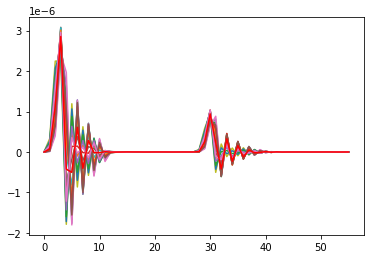

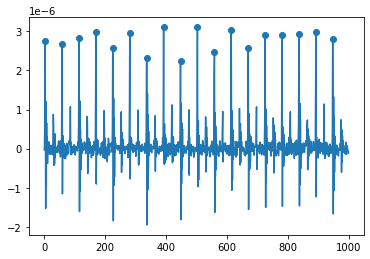

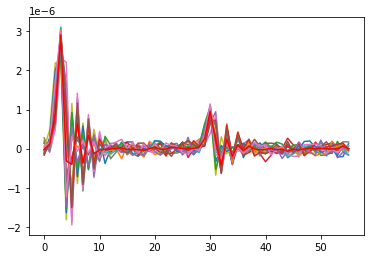

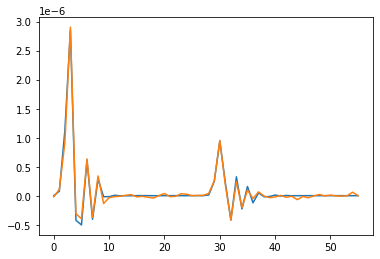

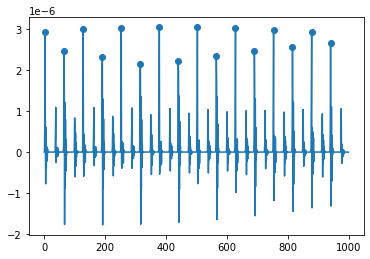

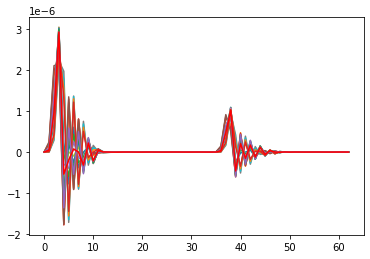

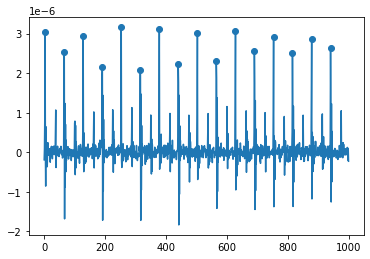

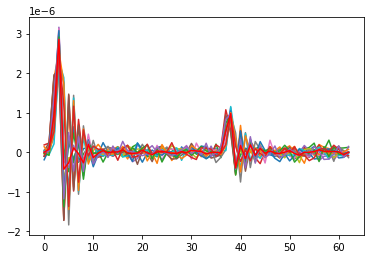

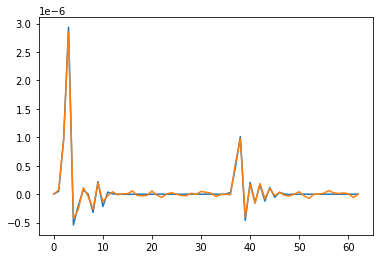

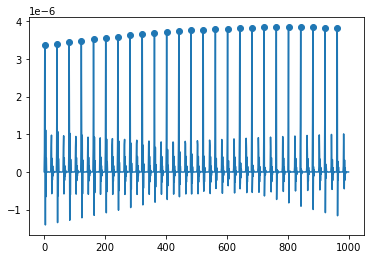

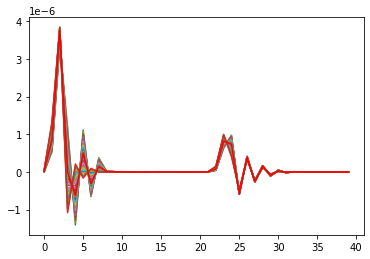

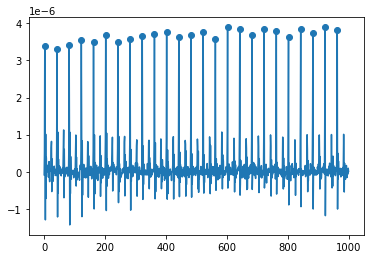

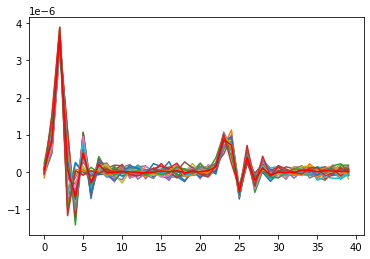

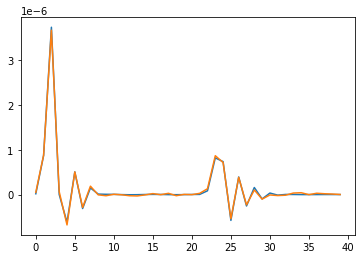

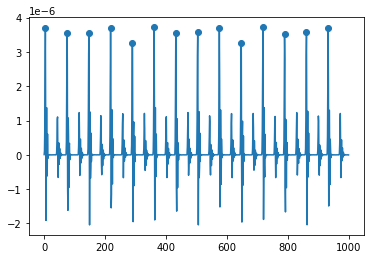

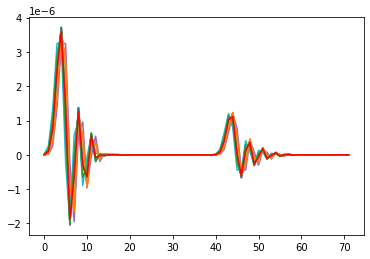

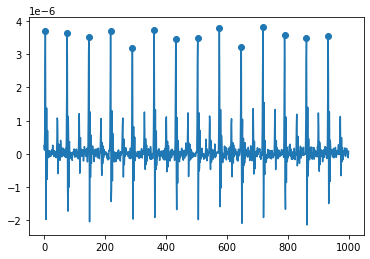

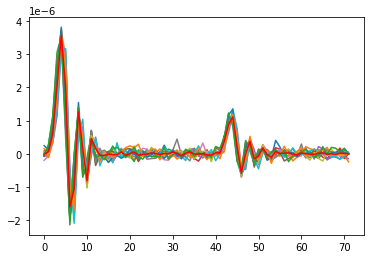

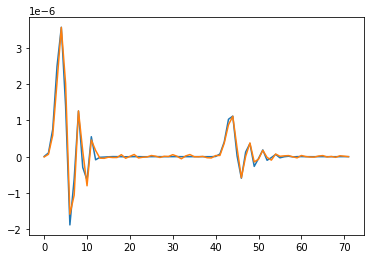

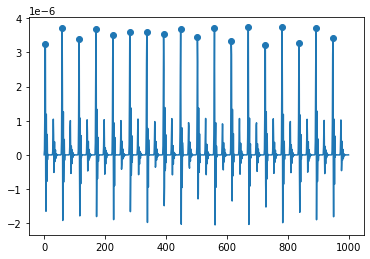

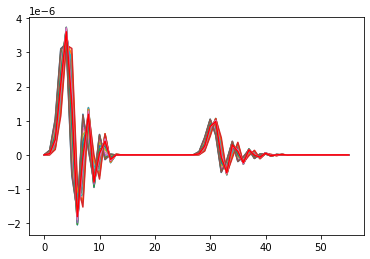

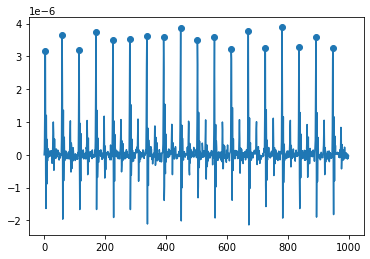

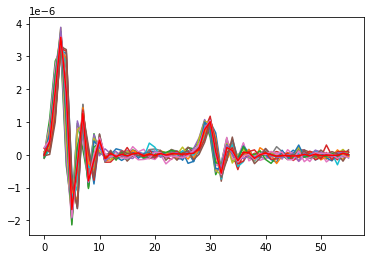

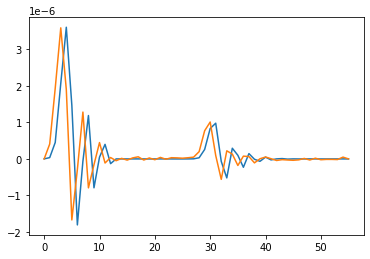

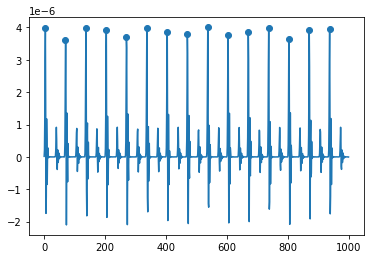

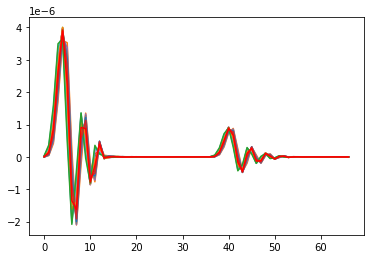

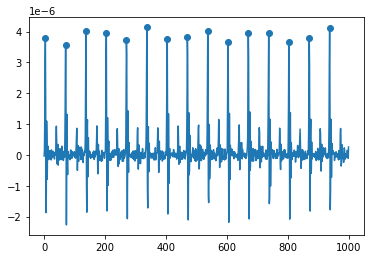

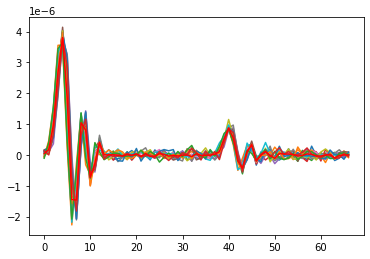

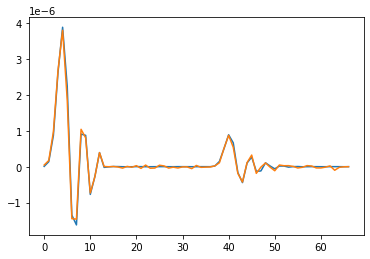

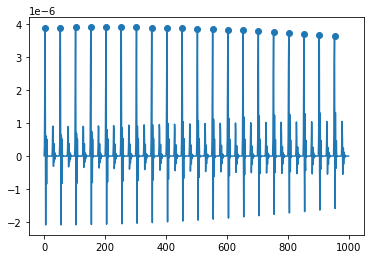

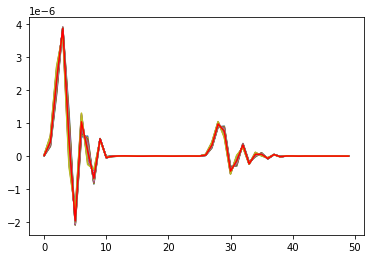

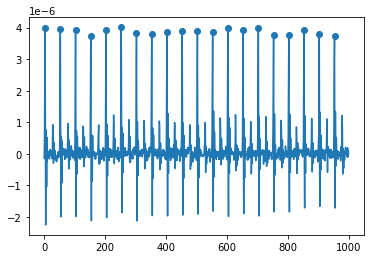

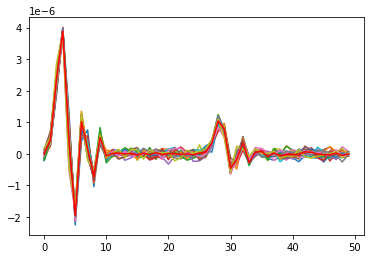

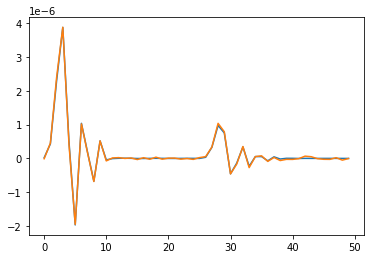

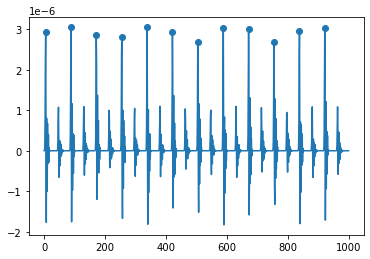

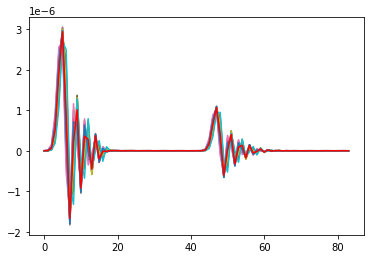

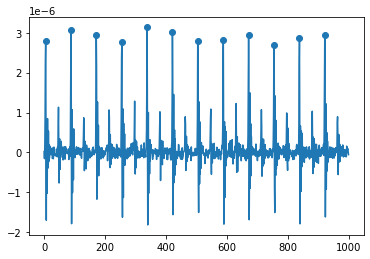

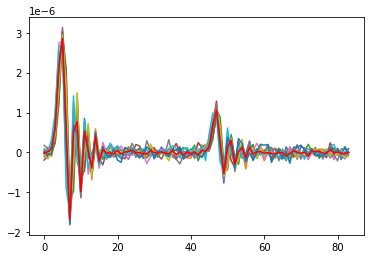

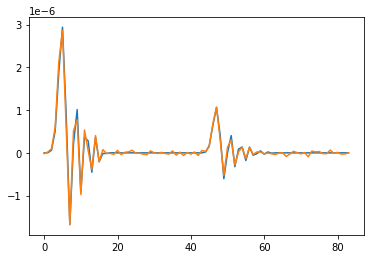

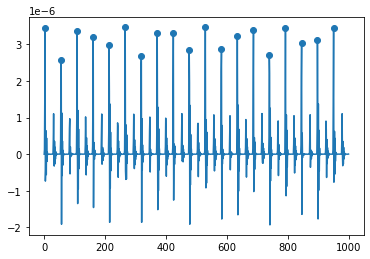

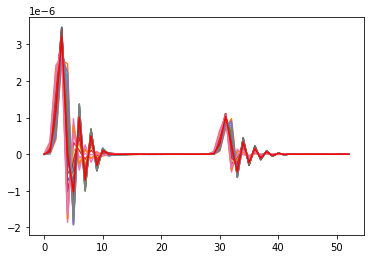

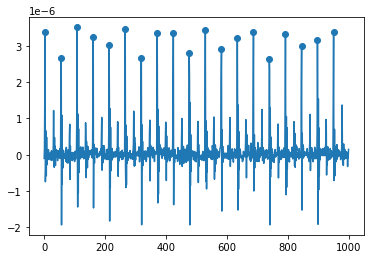

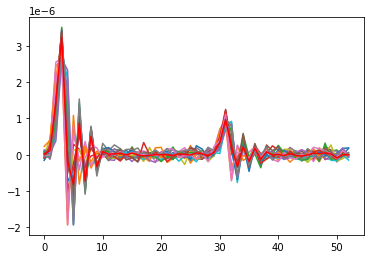

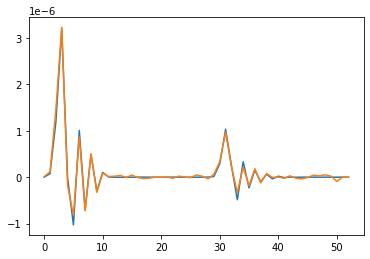

In [45]:
def segmentation(signal, rpeak):
    begin, end = 0, 0
    margin = rpeak[0]
    pieces = []

    for num in range(1, len(rpeak)):
        begin = end
        end = rpeak[num] - margin
        pieces.append(signal[begin: end])

    Nmax = 0
    for piece in pieces:
        Nmax = max(Nmax, piece.shape[0])

    pieces_padded = []
    for piece in pieces:
        N = Nmax - piece.shape[0]
        pieces_padded.append(np.pad(piece, (0, N), 'constant'))
    pieces_padded = np.array(pieces_padded)


    template = np.median(pieces_padded, 0)
    return pieces_padded, template

# idx = 11
# clean_signal = signals_n_0_train[idx]
# noisy_signal = signals_n_1_train[idx]
#
# hr = labels_n_0_train[idx, 2]
# clean_large_peaks, _ = find_peaks(clean_signal, height=np.max(clean_signal) * 0.8, distance=2000 // (hr * 1))
# noisy_large_peaks, _ = find_peaks(noisy_signal, height=np.max(noisy_signal) * 0.8, distance=2000 // (hr * 1))
#
# # print(large_peaks)
# clean_pieces_padded, clean_template = segmentation(clean_signal, clean_large_peaks)
# plt.plot(clean_signal)
# plt.scatter(clean_large_peaks, clean_signal[clean_large_peaks])
# plt.show()
# plt.figure()
#
# # for piece in pieces_padded:
# #     plt.plot(piece)
# plt.plot(template, color='r')

def plot_template(idx, signals_n_x_train, labels_n_x_train, show=False):
    signal = signals_n_x_train[idx]

    hr = labels_n_x_train[idx, 2]
    large_peaks, _ = find_peaks(signal, height=np.max(signal) * 0.4, distance=4000 // (hr * 1))

    # print(large_peaks)
    pieces_padded, template = segmentation(signal, large_peaks)

    if show:
        plt.plot(signal)
        plt.scatter(large_peaks, signal[large_peaks])
        plt.show()
        plt.figure()
        for piece in pieces_padded:
            plt.plot(piece)
        plt.plot(template, color='r')
        plt.show()
    return template

idx = 11
for idx in range(14):
    template0 = plot_template(idx, signals_n_0_train, labels_n_0_train, True)

    template1 = plot_template(idx,signals_n_0_train+np.random.normal(0, 0.1, size=signals_n_0_train.shape)/1e6, labels_n_0_train, True)
    # template1 = plot_template(idx, signals_n_1_train, labels_n_1_train, True)
    plt.figure()
    plt.plot(template0)
    plt.plot(template1)
    plt.show()

In [73]:
def split_signal(signal, period):
    num_periods = len(signal) // period
    split_signals = []

    for i in range(num_periods):
        start_idx = i * period
        end_idx = (i + 1) * period
        if end_idx >= len(signal):
            break
        print(start_idx, end_idx)
        split_signals.append(signal[start_idx:end_idx])

    return split_signals, np.median(split_signals, 0)

In [76]:


def plot_template(idx, signals_n_x_train, labels_n_x_train, show=False):
    signal = signals_n_x_train[idx]

    hr = labels_n_x_train[idx, 2]
    large_peaks, _ = find_peaks(signal, height=np.max(signal) * 0.4, distance=4000 // (hr * 1))

    # print(large_peaks)
    pieces_padded, template = split_signal(signal, 1000 // len(large_peaks))
    print(template)
    if show:
        plt.plot(signal)
        plt.scatter(large_peaks, signal[large_peaks])
        plt.show()
        plt.figure()
        for piece in pieces_padded:
            plt.plot(piece)
        plt.plot(template, color='r')
        plt.show()
    return pieces_padded, template

0 62
62 124
124 186
186 248
248 310
310 372
372 434
434 496
496 558
558 620
620 682
682 744
744 806
806 868
868 930
930 992
[ 1.16341413e-10  3.23379091e-10  6.94425772e-10  1.36375146e-09
  4.04901310e-08  3.17524322e-07  7.08449546e-07  7.55649868e-07
  8.04933414e-07  1.17233665e-06  1.09258221e-06  5.71571997e-07
 -6.39116386e-08  2.50825293e-08  1.54144189e-08  4.91384586e-08
  9.27361389e-09 -1.79223790e-09  6.41955838e-11  2.66788461e-09
  1.70275155e-09  4.70022895e-10 -3.11154957e-10 -2.22981966e-10
 -3.72379273e-10  1.27954214e-10  1.62480033e-10  1.02161682e-10
  2.51014089e-10  5.63456598e-10  8.19736297e-10  1.24559836e-09
  1.17360994e-08  8.68933630e-08  1.90989125e-07  2.03419715e-07
  2.16399981e-07  2.86885418e-07  2.52654124e-07  1.17106549e-07
  3.66776913e-09  3.77726214e-09 -6.53404481e-12  3.00677018e-10
  9.39079198e-09  7.66698391e-09 -4.08734110e-09  2.26258363e-10
  7.09151413e-09 -6.60480357e-10 -6.28977943e-10  1.51496017e-09
  8.39437587e-10  3.40578383e-1

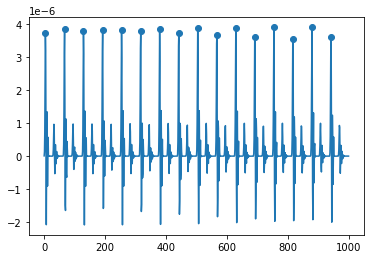

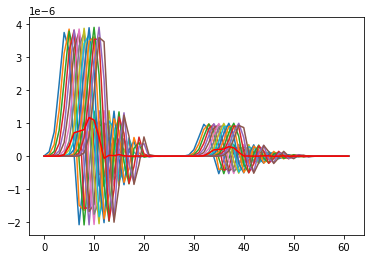

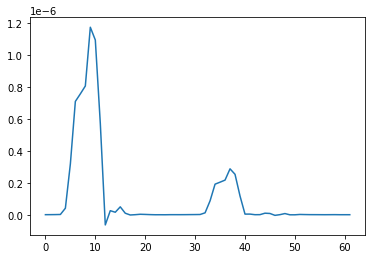

In [77]:

idx = 11
for idx in range(14):
    pieces, template0 = plot_template(idx, signals_n_0_train, labels_n_0_train, True)
    plt.plot(template0)
    plt.show()
    break

In [84]:
def compute_srvf(signal):
    derivative = np.gradient(signal)
    srvf = np.sign(derivative) * np.sqrt(np.abs(derivative))
    # print(srvf.shape)
    # plt.figure()
    # plt.plot(srvf)
    # plt.show()
    return srvf
_ = compute_srvf(pieces[0])
_ = compute_srvf(pieces[2])
_ = compute_srvf(pieces[8])


In [99]:
import numpy as np
from scipy.optimize import minimize

def objective(arguments):
    r, q1, q2 = arguments[0], arguments[1], arguments[2]
    distance_measure = np.linalg.norm(q1 - (q2 * r) * np.sqrt(r))
    return distance_measure


# q1 = compute_srvf(pieces[0]).reshape((-1, 1))
# q2 = compute_srvf(pieces[2]).reshape((-1, 1))
q1 = compute_srvf(pieces[0])
q2 = compute_srvf(pieces[2])
initial_guess_for_r = np.identity(len(pieces[0]))  # 微分同胚映射γ的初始猜测
args = [initial_guess_for_r, q1, q2]
# print(q1.shape, q2.shape)
result = minimize(objective, initial_guess_for_r)
# print("Distance Measure:", result)

C:\Users\86189\AppData\Local\Temp\ipykernel_2812\3266668275.py:17: DeprecationWarning: Use of `minimize` with `x0.ndim != 1` is deprecated. Currently, singleton dimensions will be removed from `x0`, but an error will be raised in SciPy 1.11.0.
  result = minimize(objective, initial_guess_for_r)


In [100]:
result

      fun: 0.0
 hess_inv: array([[1, 0, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 1, 0, 0],
       [0, 0, 0, ..., 0, 1, 0],
       [0, 0, 0, ..., 0, 0, 1]])
      jac: array([0., 1., 1., ..., 0., 0., 0.])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 388357
      nit: 0
     njev: 101
   status: 2
  success: False
        x: array([1., 0., 0., ..., 0., 0., 1.])

In [144]:
def f(x, a, b):
    return b / a - x

def obj(arguments):
    """objective function, to be solved."""
    x, arg_1, arg_2 = arguments[0], arguments[1], arguments[2]
    v_3 = f(x, arg_1, arg_2)
    return abs(x-v_3)

x0 = 1
initial_guess = [1,1,1]  # initial guess can be anything
result = minimize(obj, initial_guess)
print(result.x)

[0.68614066 0.84307033 1.15692967]


[ 4  9 16]


In [106]:
import numpy as np

# 定义信号 q2（示例，根据您的实际数据定义）
q2 = np.array([0.1, 0.2, 0.3, 0.4, 0.5])

# 定义时间坐标 t（示例，根据您的实际数据定义）
t = np.array([0.0, 1.0, 2.0, 3.0, 4.0])

# 定义映射函数 γ（示例，根据您的实际需求定义）
def gamma(t):
    # 这是一个示例的映射函数，您需要根据实际情况定义
    return t * 2.0

# 使用映射函数 γ 对信号 q2 进行时间对齐
t_aligned = gamma(t)  # 映射时间坐标
print(t_aligned)
# 根据新的时间坐标 t_aligned 对 q2 进行插值或采样
q2_aligned = np.interp(t_aligned, t, q2)

q2_aligned

[0. 2. 4. 6. 8.]


array([0.1, 0.3, 0.5, 0.5, 0.5])

In [145]:
import numpy as np
from scipy.optimize import minimize

def objective(arguments):
    gamma_, q1, q2, time = arguments[0], arguments[1], arguments[2], arguments[3]
    q2_o_gamma = np.interp(gamma_, time, q2)
    distance_measure = np.linalg.norm(q1 - q2_o_gamma * np.sqrt(gamma_))
    return distance_measure

q1 = compute_srvf(pieces[0])
q2 = compute_srvf(pieces[2])
time = np.linspace(0, 1, len(q1))
initial_guess_for_r = np.linspace(0, 1, len(q1),endpoint=True)  # 微分同胚映射γ的初始猜测
args = [initial_guess_for_r, q1, q2, time]
result = minimize(objective, initial_guess_for_r)

ValueError: object of too small depth for desired array

In [108]:
# initial_guess_for_r = np.linspace(0, 1, len(q1),endpoint=True)  # 微分同胚映射γ的初始猜测
# initial_guess_for_r, initial_guess_for_r.shape

(62,) (62,)


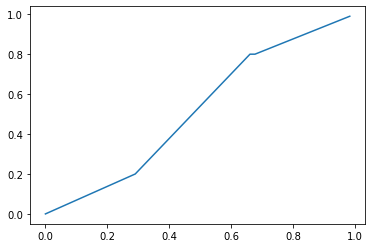

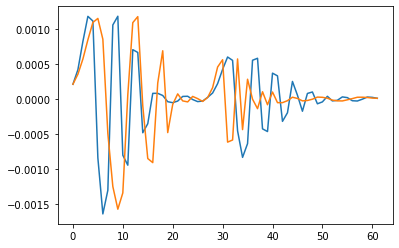

In [139]:
q1 = compute_srvf(pieces[1])

time = np.linspace(0, 1, len(q1),endpoint=False)
gamma1 = np.linspace(0, 0.2, int(len(q1)*0.3),endpoint=False)
gamma2 = np.linspace(0.2, 0.8, int(len(q1)*0.4),endpoint=True)
gamma3 = np.linspace(0.8, 1, len(q1) - int(len(q1)*0.3) - int(len(q1)*0.4),endpoint=False)
gamma_ = np.concatenate([gamma1, gamma2, gamma3])

print(gamma_.shape, time.shape)
plt.plot(time, gamma_)
plt.show()
# print(q1.shape)
plt.plot(q1)
plt.plot(np.interp(gamma_, time, q1))
# print(q)
# plt.plot(q1[gamma_])

In [130]:
import numpy as np

# 定义信号 q2，定义域在 [0, 1]（示例，根据您的实际数据定义）
t_q2 = np.linspace(0, 1, num=62)  # 时间坐标，示例为100个点
q2 = np.sin(2 * np.pi * t_q2)  # 示例信号，这里用正弦波作为示例

# 定义 γ，定义域和值域都在 [0, 1]（示例，根据您的实际数据定义）
gamma = gamma_ # 示例 γ，这里使用线性变换作为示例

# 使用 γ 对信号 q2 进行时间对齐
t_aligned = gamma  # 新的时间坐标

# 根据新的时间坐标 t_aligned 对 q2 进行插值
q2_aligned = np.interp(t_aligned, t_q2, q2)

# q2_aligned 现在包含了通过 γ 进行时间对齐的信号

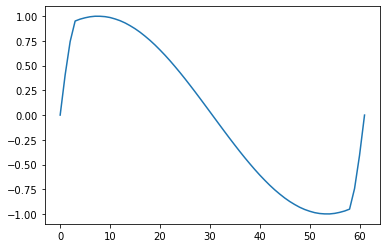

In [128]:
# plt.plot(t_aligned)
plt.plot(q2_aligned)

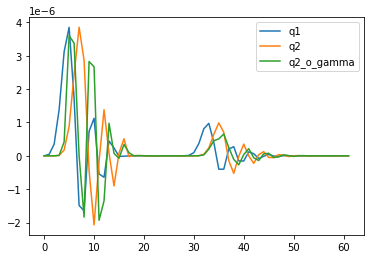

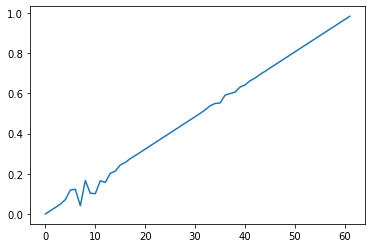

In [204]:
import numpy as np
from scipy.optimize import minimize

def objective(argument):
    gamma_ = argument
    q2_o_gamma = np.interp(gamma_, time, q2)
    distance_measure = np.linalg.norm(q1 - q2_o_gamma * np.sqrt(np.gradient(gamma_)))
    # distance_measure = np.linalg.norm(q1 - q2_o_gamma)
    return distance_measure

idx = 1
q1 = compute_srvf(pieces[idx])
q2 = compute_srvf(pieces[idx+8])
# q1 = pieces[idx]
# q2 = pieces[idx+5]
time = np.linspace(0, 1, len(q1))
initial_guess_for_r = np.linspace(0, 1, len(q1),endpoint=False)  # 微分同胚映射γ的初始猜测
result = minimize(objective, initial_guess_for_r)
gamma_ = result.x
q2_o_gamma = np.interp(gamma_, time, q2)
# q2_ = q2_o_gamma * np.sqrt(gamma_)
plt.plot(q1, label='q1')
plt.plot(q2, label='q2')
plt.plot(q2_o_gamma, label='q2_o_gamma')
# plt.plot(q2_, label='q2_')
plt.legend()
plt.show()

# plt.plot(pieces[idx][0] + np.cumsum(q1 * np.abs(q1)), label='f1')
# plt.plot(pieces[idx+2][0] + np.cumsum(q2 * np.abs(q2)), label='f2')
# # plt.plot(pieces[idx+2][0] + np.cumsum(q2_ * np.abs(q2_)), label='f2_')
# plt.plot(pieces[idx+2][0] + np.cumsum(q2_o_gamma * np.abs(q2_o_gamma)), label='f2_o_gamma')
# # plt.plot(q2_, label='q2_')
# plt.legend()
# plt.show()
plt.plot(gamma_)

In [187]:
import numpy as np

# 假设 q 是 SRVF，这是一个示例 SRVF
q = np.array([0.1, 0.2, 0.3, 0.4, 0.5])

# 计算速度（q 的一阶导数）
velocity = np.gradient(q)

# 计算位移（累积速度）
displacement = np.cumsum(velocity)

# 恢复原始函数 f，假设基线值为 baseline
baseline = 0.0  # 示例基线值，根据实际情况调整
f = displacement + baseline

# f 现在包含了从 q 恢复的原始函数

# 打印结果
print("Original Function f:", f)


Original Function f: [0.1 0.2 0.3 0.4 0.5]


C:\Users\86189\AppData\Local\Temp\ipykernel_2812\525037123.py:7: RuntimeWarning: invalid value encountered in sqrt
  distance_measure = np.linalg.norm(q1 - q2_o_gamma * np.sqrt(gamma_))
C:\Users\86189\AppData\Local\Temp\ipykernel_2812\525037123.py:7: RuntimeWarning: invalid value encountered in sqrt
  distance_measure = np.linalg.norm(q1 - q2_o_gamma * np.sqrt(gamma_))
C:\Users\86189\AppData\Local\Temp\ipykernel_2812\525037123.py:7: RuntimeWarning: invalid value encountered in sqrt
  distance_measure = np.linalg.norm(q1 - q2_o_gamma * np.sqrt(gamma_))


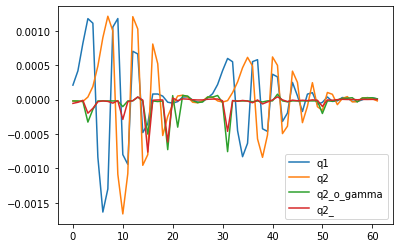

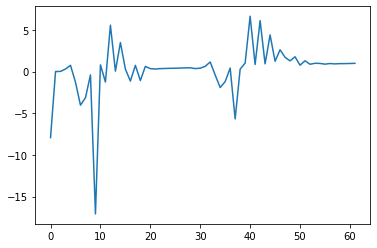

In [230]:
import numpy as np
from scipy.optimize import minimize

def objective(argument):
    gamma_ = argument
    q2_o_gamma = np.interp(gamma_, time, q2)
    distance_measure = np.linalg.norm(q1 - q2_o_gamma * np.sqrt(gamma_))
    return distance_measure

idx = 1
q1 = compute_srvf(pieces[idx])
q2 = compute_srvf(pieces[idx+8])

time = np.linspace(0, 1, len(q1))
initial_guess_for_r = np.linspace(0, 1, len(q1),endpoint=False)  # 微分同胚映射γ的初始猜测
result = minimize(objective, initial_guess_for_r)
gamma_ = result.x
q2_o_gamma = np.interp(gamma_, time, q2)
q2_ = q2_o_gamma * np.sqrt(np.abs(np.gradient(gamma_)))
plt.plot(q1, label='q1')
plt.plot(q2, label='q2')
plt.plot(q2_o_gamma, label='q2_o_gamma')
plt.plot(q2_, label='q2_')
plt.legend()
plt.show()

# # plt.plot(pieces[idx][0] + np.cumsum(q1 * np.abs(q1)), label='f1')
# # plt.plot(pieces[idx+2][0] + np.cumsum(q2 * np.abs(q2)), label='f2')
# plt.plot(pieces[idx+2][0] + np.cumsum(q2_ * np.abs(q2_)), label='f2_')
# # plt.plot(pieces[idx+2][0] + np.cumsum(q2_o_gamma * np.abs(q2_o_gamma)), label='f2_o_gamma')
# # plt.plot(q2_, label='q2_')
# plt.legend()
# plt.show()
plt.plot(gamma_)

C:\Users\86189\AppData\Local\Temp\ipykernel_2812\2587535895.py:8: RuntimeWarning: invalid value encountered in sqrt
  distance_measure = np.linalg.norm(q1 - q2_o_gamma * np.sqrt(gamma_))
C:\Users\86189\AppData\Local\Temp\ipykernel_2812\2587535895.py:8: RuntimeWarning: invalid value encountered in sqrt
  distance_measure = np.linalg.norm(q1 - q2_o_gamma * np.sqrt(gamma_))
C:\Users\86189\AppData\Local\Temp\ipykernel_2812\2587535895.py:8: RuntimeWarning: invalid value encountered in sqrt
  distance_measure = np.linalg.norm(q1 - q2_o_gamma * np.sqrt(gamma_))


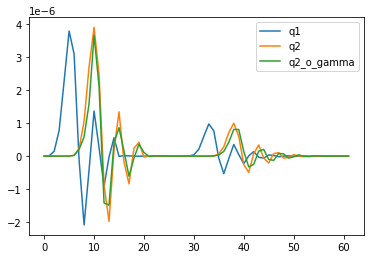

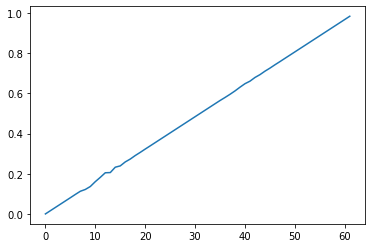

In [228]:
import numpy as np
from scipy.optimize import minimize

def objective(argument):
    gamma_ = argument
    q2_o_gamma = np.interp(gamma_, time, q2)
    # distance_measure = np.linalg.norm(q1 - q2_o_gamma * np.sqrt(np.abs(np.gradient(gamma_))))
    distance_measure = np.linalg.norm(q1 - q2_o_gamma * np.sqrt(gamma_))
    # distance_measure = np.linalg.norm(q1 - q2_o_gamma)
    return distance_measure

idx = 2
q1 = pieces[idx]
q2 = pieces[idx+10]
time = np.linspace(0, 1, len(q1))
initial_guess_for_r = np.linspace(0, 1, len(q1),endpoint=False)
result = minimize(objective, initial_guess_for_r)
gamma_ = result.x
q2_o_gamma = np.interp(gamma_, time, q2)
plt.plot(q1, label='q1')
plt.plot(q2, label='q2')
plt.plot(q2_o_gamma, label='q2_o_gamma')
plt.legend()
plt.show()
plt.plot(gamma_)

In [212]:
np.interp(gamma_, time, q2)

array([-1.94879554e-05, -2.64721087e-05, -2.65560583e-05,  1.26628924e-04,
        8.36749300e-04,  1.20868547e-03,  1.82314192e-04,  1.20879868e-03,
        1.04187906e-03,  5.57030983e-04,  5.61641715e-04,  5.55808707e-04,
        5.62014807e-04,  5.54469885e-04,  5.60870350e-04,  5.53663090e-04,
        5.60588128e-04,  5.52776008e-04,  5.64346883e-04,  5.54033098e-04,
        5.63660506e-04,  5.55612298e-04,  5.63671435e-04,  5.55140100e-04,
        5.64264723e-04,  5.55674715e-04,  5.63959081e-04,  5.55743565e-04,
        5.64005984e-04,  5.55660128e-04,  5.61015832e-04,  5.54658459e-04,
        5.57854182e-04,  5.54066054e-04,  5.57820746e-04,  5.54079432e-04,
        5.57808983e-04,  5.54245017e-04,  5.56323533e-04,  5.53984745e-04,
        5.56365389e-04,  5.53737214e-04,  5.54399215e-04,  5.53753390e-04,
        5.53729143e-04,  5.53771592e-04,  5.53846981e-04,  5.53742662e-04,
        5.53657149e-04,  5.53873112e-04,  5.53669549e-04,  5.53894040e-04,
        5.53914177e-04,  

(array([ 1.22181970e-09,  4.54831909e-08,  3.50602086e-07,  1.38751180e-06,
         3.12015799e-06,  3.85359825e-06,  1.72072724e-06, -1.48704031e-06,
        -1.64853908e-06,  7.34584428e-07,  1.12694272e-06, -5.42764618e-07,
        -6.43013699e-07,  4.44725688e-07,  2.36237849e-07, -1.50748383e-08,
        -1.02777699e-08, -1.91401622e-09,  2.97633593e-09,  3.22705001e-09,
         1.36980714e-10, -2.12862861e-09, -1.50334482e-09,  6.35996099e-10,
         1.66511564e-09,  5.42203427e-10, -9.83697130e-10, -1.10518256e-09,
         1.74816509e-10,  1.36835242e-08,  9.64337938e-08,  3.69819707e-07,
         8.11813528e-07,  9.75419843e-07,  4.03567334e-07, -4.01371590e-07,
        -4.00096732e-07,  2.07695757e-07,  2.73301860e-07, -1.51773078e-07,
        -1.53960712e-07,  1.19739930e-07,  6.38664832e-08, -8.18093115e-08,
        -1.21406497e-08,  4.35576972e-08, -6.22202284e-09, -1.65715958e-08,
         6.51660038e-09,  3.64823729e-09, -2.58129139e-09,  3.72407809e-10,
         4.2

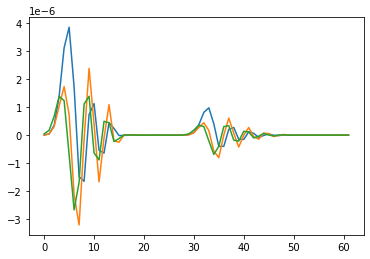

In [240]:
q1 = pieces[idx]
plt.plot(q1)
plt.plot(np.insert(np.diff(q1), 0, 0))
plt.plot(np.gradient(q1))
q1, np.diff(q1)

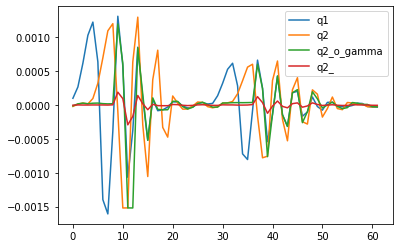

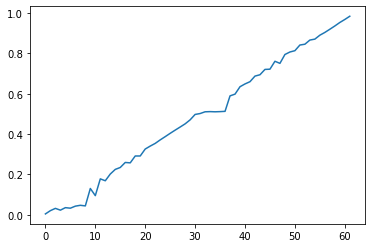

In [252]:
import numpy as np
from scipy.optimize import minimize

def compute_srvf(signal):
    derivative = np.gradient(signal)
    srvf = np.sign(derivative) * np.sqrt(np.abs(derivative))
    return srvf

def objective(argument):
    gamma_ = argument
    q2_o_gamma = np.interp(gamma_, time, q2)
    # distance_measure = np.linalg.norm(q1 - q2_o_gamma * np.sqrt(np.abs(np.gradient(gamma_))))
    distance_measure = np.linalg.norm(q1 - q2_o_gamma)
    return distance_measure


def inequality_constraint(x):
    return np.gradient(x)

constraints = [{'type': 'ineq', 'fun': inequality_constraint}]

idx = 2
q1 = compute_srvf(pieces[idx])
q2 = compute_srvf(pieces[idx+8])
time = np.linspace(0, 1, len(q1))

initial_guess_for_r = np.linspace(0, 1, len(q1),endpoint=False)
result = minimize(objective, initial_guess_for_r, constraints=constraints)
gamma_ = result.x

q2_o_gamma = np.interp(gamma_, time, q2)
q2_ = q2_o_gamma * np.sqrt(np.abs(np.gradient(gamma_)))

plt.plot(q1, label='q1')
plt.plot(q2, label='q2')
plt.plot(q2_o_gamma, label='q2_o_gamma')
plt.plot(q2_, label='q2_')

plt.legend()
plt.show()
plt.plot(gamma_)

In [246]:
import numpy as np

# 创建参考数据集xp和对应数值fp
xp = np.array([1, 2, 3, 4, 5])
fp = np.array([10, 20, 30, 40, 50])

# 要插值的数据点x
x = [1, 1.5, 2.5, 3.6]

# 使用np.interp()进行线性插值
result = np.interp(x, xp, fp)

# 打印插值结果
print(result)

[10. 15. 25. 36.]


In [ ]:
from scipy.optimize import minimize

def inequality_constraint(x):
    return np.gradient(x)

# 定义约束条件列表
constraints = [{'type': 'ineq', 'fun': inequality_constraint}]

# 调用 minimize 函数并传入约束条件
result = minimize(objective, initial_guess, constraints=constraints)

# 打印优化结果
print(result)


In [254]:
import numpy as np

# 假设 f 和 γ 是一维数组
f = np.array([1, 2, 3, 4, 5])  # 示例数组 f
gamma = np.array([0, 0.25, 0.5, 0.75, 1.0])  # 示例数组 gamma

# 使用数组索引进行 temporal warping
warped_f = f[gamma * (len(f) - 1))]

# 打印 temporal warping 后的结果
print(warped_f)

TypeError: only size-1 arrays can be converted to Python scalars